# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('./OneDrive_1_07-02-2023/Position_Salaries.csv')
dataset

Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000

In [7]:
X = dataset.drop('Salary', 1)
y = dataset['Salary']

C:\Users\sp1584\AppData\Local\Temp\ipykernel_17172\3458434026.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop('Salary', 1)


In [11]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_enc = pd.DataFrame(enc.fit_transform(X[['Position']]).toarray(), columns = enc.get_feature_names())
X_enc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


x0_Business Analyst  x0_C-level  x0_CEO  x0_Country Manager  \
0                  1.0         0.0     0.0                 0.0   
1                  0.0         0.0     0.0                 0.0   
2                  0.0         0.0     0.0                 0.0   
3                  0.0         0.0     0.0                 0.0   
4                  0.0         0.0     0.0                 1.0   
5                  0.0         0.0     0.0                 0.0   
6                  0.0         0.0     0.0                 0.0   
7                  0.0         0.0     0.0                 0.0   
8                  0.0         1.0     0.0                 0.0   
9                  0.0         0.0     1.0                 0.0   

   x0_Junior Consultant  x0_Manager  x0_Partner  x0_Region Manager  \
0                   0.0         0.0         0.0                0.0   
1                   1.0         0.0         0.0                0.0   
2                   0.0         0.0         0.0                0.0   
3                   0.0         1.0         0.0                0.0   
4                   0.0         0.0         0.0                0.0   
5                   0.0         0.0         0.0                1.0   
6                   0.0         0.0         1.0                0.0   
7                   0.0         0.0         0.0                0.0   
8                   0.0         0.0         0.0                0.0   
9                   0.0         0.0         0.0                0.0   

   x0_Senior Consultant  x0_Senior Partner  
0                   0.0                0.0  
1                   0.0                0.0  
2                   1.0                0.0  
3                   0.0                0.0  
4                   0.0                0.0  
5                   0.0                0.0  
6                   0.0                0.0  
7                   0.0                1.0  
8                   0.0                0.0  
9                   0.0                0.0

In [12]:
X = X_enc.join(X.drop('Position', 1))
X

C:\Users\sp1584\AppData\Local\Temp\ipykernel_17172\4098750236.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X_enc.join(X.drop('Position', 1))


x0_Business Analyst  x0_C-level  x0_CEO  x0_Country Manager  \
0                  1.0         0.0     0.0                 0.0   
1                  0.0         0.0     0.0                 0.0   
2                  0.0         0.0     0.0                 0.0   
3                  0.0         0.0     0.0                 0.0   
4                  0.0         0.0     0.0                 1.0   
5                  0.0         0.0     0.0                 0.0   
6                  0.0         0.0     0.0                 0.0   
7                  0.0         0.0     0.0                 0.0   
8                  0.0         1.0     0.0                 0.0   
9                  0.0         0.0     1.0                 0.0   

   x0_Junior Consultant  x0_Manager  x0_Partner  x0_Region Manager  \
0                   0.0         0.0         0.0                0.0   
1                   1.0         0.0         0.0                0.0   
2                   0.0         0.0         0.0                0.0   
3                   0.0         1.0         0.0                0.0   
4                   0.0         0.0         0.0                0.0   
5                   0.0         0.0         0.0                1.0   
6                   0.0         0.0         1.0                0.0   
7                   0.0         0.0         0.0                0.0   
8                   0.0         0.0         0.0                0.0   
9                   0.0         0.0         0.0                0.0   

   x0_Senior Consultant  x0_Senior Partner  Level  
0                   0.0                0.0      1  
1                   0.0                0.0      2  
2                   1.0                0.0      3  
3                   0.0                0.0      4  
4                   0.0                0.0      5  
5                   0.0                0.0      6  
6                   0.0                0.0      7  
7                   0.0                1.0      8  
8                   0.0                0.0      9  
9                   0.0                0.0     10

## Training the Linear Regression model on the whole dataset

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)


In [17]:
X_poly.shape, X.shape

((10, 1365), (10, 11))

In [18]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

In [20]:
X.shape

(10, 11)

## Visualising the Linear Regression results

ValueError: x and y must be the same size

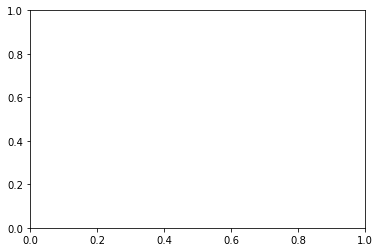

In [21]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

ValueError: x and y must be the same size

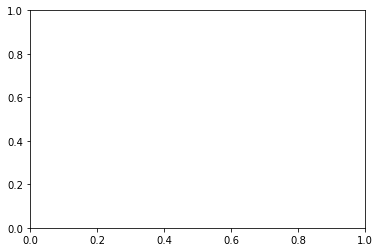

In [22]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [ ]:
lin_reg.predict([[6.5]])

## Predicting a new result with Polynomial Regression

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))